<a href="https://colab.research.google.com/github/isabelledionne29-netizen/Project-4/blob/main/copy_of_nma_mdanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Welcome to the world of biomolecule dynamics! This lesson aims to teach you the basic protocol of simulating protein dynamics and analyzing the simulation. If you don't know how to code, don't worry! These lessons assume no prior knowledge of code or Python.

## Analyzing molecular dynamics
MD simulates the motion of molecules and can describe how the structure changes over time. The analysis of molecular dynamics extracts properties from the "movie" of the molecule such as how mobile areas of the molecule were and how the pKa values of certain functional groups can vary as the molecule moves. This information can help describe the mechanism of action as conformational changes in enzymes are linked to catalytic activity and pKa is related to nucleophilicty.

The specific protocol for simulating dynamics in this notebook is elastic networks modeling. In this approach, the amino acids are simiplified a bit and connected by virtual springs. This allows for simulation of the structure around the starting state to show **potential** dynamic areas within the molecule. While not as comprehensive as all-atom simulations of biomolecules which include often solvent and atoms charges, this approach is a good first step in understanding how the molecule moves. In addition, this approach can provide insights into how how drastic changes in protein sequence are to the dynamics of the protein. As with all computational approaches, these models and simulations should be supported with experimental data as feasible.

## What will I get from this Colab?
The first section of the Colab sets up the Python environment and runs the simulation of motion. The second section of the Colab describes which areas of the molecule are most dynamic. Finally, the code will calculate the pKa values for each frame of the simulation to show pKa values over time. These values and outputs can be compared to simulations of mutants or the protein with ligands to determine how these changes to the simulation environment alter the dynamics of the molecule.



---

This document has a list of [Frequently Asked Questions](https://docs.google.com/document/d/1kzkOi1T6QYjcyIoMXpU114B15WE0VcGnof5xvG5zdvA/edit?usp=sharing), reach out to your instructor if you have additional questions.


####**Please make a copy of this colab for your personal use!!**

A few things to start:

1.   These lessons only work in Google Chrome
2.   If you want to save your progress, go to File> Save a Copy in Drive; then locate a spot in your Drive folder
3.   Clicking the "play" button to the top left of a code block runs the code. Sometimes you can see the code and interact with it. However, if the code is hidden  it is to run adminstrative tasks in the background and you do not need to worry unless you are interested.
4. Sometimes the code may be hidden from view. To view it, click the '>' on the left of the title, until it changes to 'v'. This will reveal the code in that line.

Here are the files you will need for this code to run:
*  A **.pdb** or **.cif** file containing a set of atomic coordinates of your molecule. **.pdb** stands for a Protein Data Bank file, while a **.cif** file is a new form of coordinates and are the outputs of many structure prediction programs like AlphaFold3. In either case, the file contains the three-dimensional structural data of your protein directly from the Protein Data Bank or from modeling.


If you would like a tutorial on Python basics, please reference [this colab](https://colab.research.google.com/drive/1UVupXh23ArJp2F9vqTmkVh0JnjEaemi1?usp=sharing ). It is not necessary to do this, however if you are interested in learning more about coding it is a great resource to use!

This should take approximately 10 minutes to run.

---

**Acknowledgments**
- Colab developed by **Angela Kayll, Angelina Sardelli, and Christopher Berndsen** at James Madison University (ver 1 2025) with input and feedback from students in CHEM260 and members of the [MCC community](https://www.mdhcures.org/).


In [ ]:
#@title **1a. Install and load dependencies**
#@markdown Press PLAY **after** the above cell has completed and the session restarted.
#@markdown This will take a few minutes.
!pip install -q matplotlib
!pip install --upgrade MDAnalysis --quiet
!pip install -q pandas
!pip install -q seaborn
!pip install -q propkatraj
!pip install -q nrgten
!pip install mdtraj
!pip install biopython --quiet

from Bio.PDB import MMCIFParser, PDBIO
import pandas as pd
import matplotlib.pyplot as pp
import MDAnalysis as mda
import os
from MDAnalysis.analysis import rms, align, diffusionmap
import seaborn as sns
from propkatraj import PropkaTraj
from nrgten.encom import ENCoM
import mdtraj as md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.6/391.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.8 MB/s eta 0:00:00


In [ ]:
# Load Google Drive
#@title ### **1b. Import Google Drive**
#@markdown Click PLAY to make your Google Drive accessible.
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive




---

## **1c. Loading your pdb or cif file**

At this point, you should have all libraries and dependencies installed and all necessary input files already in your Google Drive folder. This is what you did in the last section! Now, you will upload the file that describes the structure of your protein. This file is called a .pdb file.

Below, you should provide the names of all input files and the pathway of your Google Drive folder containing them.

*   **file_name** is the name of your .pdb or .cif file. Add the name where it says "xxx". Make sure there are no extra spaces in the file name!
*  **Google_Drive_path** is where your simulation files are. After MyDrive/, paste the name of your folder where the "xxx" is. Make sure there are no spaces in the folder name!

When you are ready, press PLAY.

**If this code has run successfully, you should see a new folder in the directory called outputs**

In [ ]:
#@title Please provide the necessary input information below:
#@markdown Please reference the text box above for instructions regarding file name inputs and directories.
%%capture
file_name = 'output_model_top1.cif' #@param {type:"string"}
#DCD_file_name = 'xxx.dcd' #@param {type:"string"}
#file_name = PDB_file_name
Google_Drive_Path = '/content/drive/MyDrive/MDH2_Project4' #@param {type:"string"}
workDir = Google_Drive_Path

def cif_to_pdb(cif_file, pdb_file):

    parser = MMCIFParser()
    structure = parser.get_structure("structure", cif_file)

    io = PDBIO()
    io.set_structure(structure)
    io.save(pdb_file)


if file_name.endswith('.cif'):
    print("Converting cif to pdb")
    ciffile = os.path.join(workDir, str(file_name))
    pdbfile = os.path.join(workDir, str(file_name).replace('.cif', '.pdb'))
    cif_to_pdb(ciffile, pdbfile)

if file_name.endswith('.cif'):
    file_name = str(file_name).replace('.cif', '.pdb')
else:
    file_name = structure_file_name

# make the outputs directory
!mkdir -p $workDir/outputs

# connect to MDAnalysis
#dcd =  os.path.join(workDir, str(DCD_file_name))
pdb = os.path.join(workDir, str(file_name))
#u = mda.Universe(pdb, dcd)


## **2. Run the elastic network modeling**
When you push play, the code will simulate the dynamics of your protein and generate a single .pdb file which contains the results of the simulation. The default parameters are to record the first two non-trivial modes and to produce at most 300 conformations. The reasoning behind each is described below along with how to adapt the code.



---


*   **Non-trivial modes:** The non-trivial modes are the ones that describe protein dynamics. There are 6 trivial modes: rotation in x, y, and z and translation along x, y, and z. The first non-trivial mode is 7 and there can be hundreds of non-trival modes. In practice, the first 2 to 5 non-trivial modes account for most of the protein motion. More modes means more information, but may or may not increase accuracy.

* **Changing the number of modes:**

In the code, there is this line:


```
model.build_conf_ensemble([7,8], outfile, max_conformations=300)
```
Replace the list `[7,8]` with additional numbers as needed and increase `max_conformations` to 1000. This will increase the conformation space that is sampled but result in a much larger .pdb file output. 2 modes results in a file that is ~20-30 MB, adding an additional mode increases this value to 200-300 MB.





In [ ]:
#@markdown Conformational ensemble will be saved in the outputs directory as **ensemble.pdb**
start = os.path.join(workDir, str(file_name))
model = ENCoM(start)
outfile = os.path.join(workDir, 'outputs', 'ensemble.pdb')
model.build_conf_ensemble([7,8], outfile, max_conformations=300)

trj = outfile
u = mda.Universe(trj)

# Analysis of the trajectory
We will use the MDAnalysis package to do the analysis and Matplotlib to plot our results. In the first step we will load the ensemble.pdb file from the outputs.

---



---
## 3. Root Mean Square Fluctuation plot

The code below calculates the root mean square fluctuation, effectively determining how much motion each amino acid has during the simulation. It is similar to RMSD, except instead of examining positional differences in the entire structure over time, it specifies the movement/fluctuation of each residue during a simulation.



---

**If there are high RMSF values** are the ends of the plot, it means that the termini (either N or C) are flexible, which for most proteins makes sense. The high flexbility of the termini can greatly distort the interpretation of the relative magnitude of the dynamics. **If you have a multimeric protein**, remember there will be multiple termini and it will appear that there is a spike of flexibility in the middle of your plot corresponding to where one subunit ends and the next one begins. *Consider ignoring the flexibility of the termini if the values are >5.*

/usr/local/lib/python3.12/dist-packages/MDAnalysis/analysis/base.py:562: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time
/usr/local/lib/python3.12/dist-packages/MDAnalysis/analysis/rms.py:1000: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.12/dist-packages/MDAnalysis/analysis/rms.py:1000: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


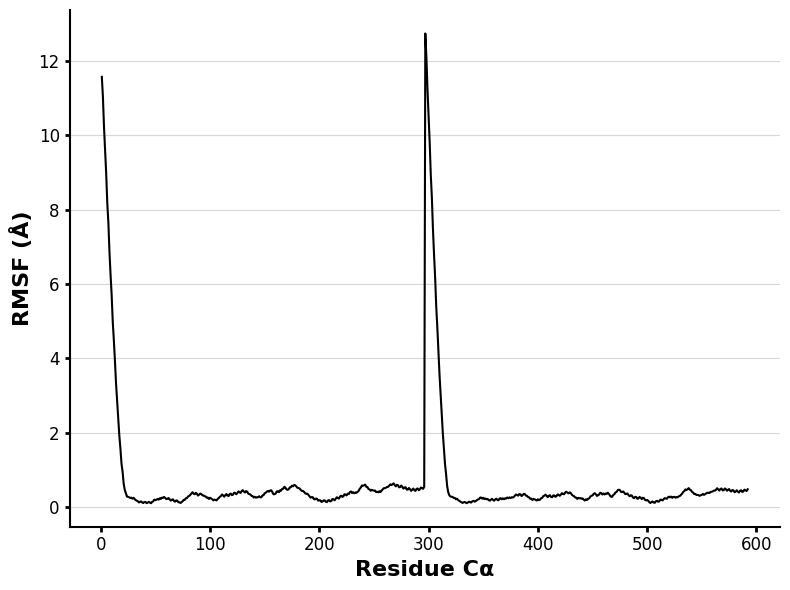

In [ ]:
#@title Calculate the RMSF
# calculate the root mean square flucuation, effectively how much motion each amino acid has during the simulation
calphas = u.select_atoms("name CA") #Commonly the RMSD is computed using the aC of the protein to evaluate protein flucturation respecting the initial coordinates
rmsfer = rms.RMSF(calphas,verbose=False).run()
RMSF_table=pd.DataFrame(rmsfer.rmsf,index=calphas.resnums,columns=['RMSF']) #Saving the RMSF value for every aC residue
RMSF_table['aa'] = range(1, len(RMSF_table) + 1)
# save the data
rmsf_file = os.path.join(workDir, 'outputs', 'rmsf_df.csv')
RMSF_table.to_csv(rmsf_file)

# make the plot
pp.rcParams['axes.linewidth'] = 1.5
fig, ax = pp.subplots(figsize=(8,6))

pp.plot(range(1, len(RMSF_table) + 1), rmsfer.rmsf,linewidth=1.5,color='k')

pp.xlabel ('Residue Cα',fontsize=16,fontweight='bold')
pp.ylabel ('RMSF (Å)',fontsize=16,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pp.tick_params ('both',width=2,labelsize=12)
pp.grid (axis='y',alpha=0.5)
pp.tight_layout()
rmsfpp_file = os.path.join(workDir, 'outputs', 'rmsf_plot.png')
pp.savefig(rmsfpp_file)
pp.show()
# save the plot


## 4. Predict pKa values
This takes a bit of time (sometimes 20+ minutes). Produces a spreadsheet of pKa at each step in the trajectory for each amino acid side chain that typically ionizes under biological conditions. The amino acids are indicated by residue number in the protein, so it may not exactly match the sequence numbering if the simulation uses a distinct numbering scheme.
The describe cell gives a statical glimpse of the trajectory, while the save the data cell saves the entire set of data for plotting using another program.

**Make sure to only press PLAY once the previous run is complete!!**



---
If these step runs for >30 minutes, it could be because you have A LOT of simulation frames. If your ensemble is >200 MB, consider replacing the `pkatraj.run()` commmand with `pkatraj.run(step=3)`. This will analyze every third step of the simulation. This change will decrease the sampling of conformations and the coverage of pKa prediction.


In [ ]:
#@title Predict the pKa values
pkatraj = PropkaTraj(u, select='protein', skip_failure=True)
pkatraj.run()

/usr/local/lib/python3.12/dist-packages/MDAnalysis/analysis/base.py:562: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/PDB.py:885: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/PDB.py:1282: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn(


## Summary of the data
The two steps below provide the outputs of the pKa prediction. The summary file provides the statistics on the run. The column headers indicate the amino acid number in the structure file. This may or may not have been altered during the simulation, so best bet is to view the input .pdb file or the ensemble file and determine numbering that the computer saw. Never assume that the computer read the file and did not alter the numbering.

In [ ]:
#@title Show the summary file
#  show the summary file
pkatraj.results.pkas.describe()

,1,7,14,15,26,45,52,56,57,60,...,276,280,282,286,287,289,290,293,296,296
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,7.908385,12.474158,12.469769,12.449100,10.199494,7.896938,12.859804,11.579052,4.676082,6.252014,...,2.885917,4.631776,11.433178,11.529826,10.302982,4.724943,2.634848,10.704886,10.380056,3.320383
std,0.012904,0.001411,0.003447,0.003890,0.000562,0.014047,0.011257,0.011904,0.057673,0.002934,...,0.000202,0.505381,0.005481,0.002366,0.032100,0.003954,0.028500,0.025847,0.016442,0.001142
min,7.889807,12.470892,12.459223,12.441711,10.198134,7.876773,12.821191,11.552667,4.561158,6.244069,...,2.885321,4.171381,11.421568,11.524765,10.228679,4.716962,2.580990,10.651801,10.363837,3.317880
25%,7.897824,12.473162,12.468062,12.445964,10.199180,7.886450,12.854207,11.571337,4.633121,6.249379,...,2.885766,4.220459,11.428944,11.528050,10.279293,4.721816,2.610862,10.684379,10.365247,3.319482
50%,7.906344,12.474536,12.470713,12.448496,10.199522,7.892944,12.860579,11.577889,4.675183,6.252555,...,2.885955,4.301063,11.433130,11.529834,10.306314,4.724919,2.634353,10.705365,10.366651,3.320422
75%,7.919483,12.475180,12.472448,12.451604,10.199844,7.907154,12.868153,11.585054,4.718282,6.254196,...,2.886072,5.278505,11.437531,11.531612,10.330882,4.728124,2.658565,10.726039,10.398222,3.321252
max,7.934642,12.476811,12.473880,12.458654,10.200873,7.930007,12.878814,11.608913,4.806965,6.258407,...,2.886261,5.304953,11.444574,11.534781,10.368518,4.732882,2.692327,10.754622,10.399000,3.322765


In [ ]:
#@title Save the pKa data
# save the pka data
pka_file = os.path.join(workDir, 'outputs', 'pkas_over_traj.csv')
pkatraj.results.pkas.to_csv(pka_file)

# save pkatraj.results.pkas.describe() file to csv
des_df = pkatraj.results.pkas.describe()
des_file = os.path.join(workDir, 'outputs', 'pkas_describe.csv')
des_df.to_csv(des_file)

# Congrats, you have finished the Colab! :-)

Potential next steps:


1.   View your structure and identify if the RMSF prediction makes sense.
2.   Determine how the pKa of the active site amino acids change with the protein conformation
3.   Make changes to the sequence and predict the effects on the structure



